# Student Result Prediction

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import plotly as p 
import seaborn as sns
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px 

# Reading Data From the Datasetm

In [2]:
df = pd.read_csv("data.csv") 

# View the Data

In [3]:
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16


In [4]:
df.tail()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
451,6.9,7.00,6.85,6.15,7.2,115,M,17404.0,NaN,28
452,6.4,6.82,6.48,5.90,6.7,115,M,17405.0,NaN,16
453,6.7,6.79,6.55,5.98,7.0,115,F,17406.0,NaN,28
454,6.2,6.75,6.62,5.79,6.8,115,F,17407.0,NaN,16
455,6.8,6.95,6.72,5.98,7.1,115,M,17408.0,NaN,28


In [5]:
df.shape    # View the Dimensions of the data. 

(456, 10)

In [6]:
df.describe()   # View the Statistical Summary of the Data.  

,1st,2nd,3rd,4th,5th,College Code,Roll,Roll no.,Subject Code
count,454.000000,452.000000,454.000000,451.000000,450.000000,456.000000,410.000000,46.000000,456.000000
mean,6.763524,6.896128,6.617004,6.346608,7.136667,129.826754,17158.573171,17042.500000,20.657895
std,0.607611,0.551340,0.581729,0.843526,0.712301,35.408676,118.685839,13.422618,5.854393
min,3.850000,3.900000,3.960000,4.290000,4.000000,115.000000,17017.000000,17020.000000,16.000000
25%,6.400000,6.750000,6.450000,5.790000,6.800000,115.000000,17052.250000,17031.250000,16.000000
50%,6.700000,6.845000,6.620000,5.980000,7.000000,115.000000,17126.500000,17042.500000,16.000000
75%,6.900000,7.000000,6.850000,6.680000,7.200000,116.000000,17243.750000,17053.750000,28.000000
max,9.150000,9.210000,9.590000,9.310000,9.460000,241.000000,17408.000000,17065.000000,28.000000


In [7]:
df.describe().T   # Transpose of the Statistical summary view. 

,count,mean,std,min,25%,50%,75%,max
1st,454.0,6.763524,0.607611,3.85,6.40,6.700,6.90,9.15
2nd,452.0,6.896128,0.551340,3.90,6.75,6.845,7.00,9.21
3rd,454.0,6.617004,0.581729,3.96,6.45,6.620,6.85,9.59
4th,451.0,6.346608,0.843526,4.29,5.79,5.980,6.68,9.31
5th,450.0,7.136667,0.712301,4.00,6.80,7.000,7.20,9.46
College Code,456.0,129.826754,35.408676,115.00,115.00,115.000,116.00,241.00
Roll,410.0,17158.573171,118.685839,17017.00,17052.25,17126.500,17243.75,17408.00
Roll no.,46.0,17042.500000,13.422618,17020.00,17031.25,17042.500,17053.75,17065.00
Subject Code,456.0,20.657895,5.854393,16.00,16.00,16.000,28.00,28.00


In [8]:

df.describe()

,1st,2nd,3rd,4th,5th,College Code,Roll,Roll no.,Subject Code
count,454.000000,452.000000,454.000000,451.000000,450.000000,456.000000,410.000000,46.000000,456.000000
mean,6.763524,6.896128,6.617004,6.346608,7.136667,129.826754,17158.573171,17042.500000,20.657895
std,0.607611,0.551340,0.581729,0.843526,0.712301,35.408676,118.685839,13.422618,5.854393
min,3.850000,3.900000,3.960000,4.290000,4.000000,115.000000,17017.000000,17020.000000,16.000000
25%,6.400000,6.750000,6.450000,5.790000,6.800000,115.000000,17052.250000,17031.250000,16.000000
50%,6.700000,6.845000,6.620000,5.980000,7.000000,115.000000,17126.500000,17042.500000,16.000000
75%,6.900000,7.000000,6.850000,6.680000,7.200000,116.000000,17243.750000,17053.750000,28.000000
max,9.150000,9.210000,9.590000,9.310000,9.460000,241.000000,17408.000000,17065.000000,28.000000


In [9]:
df.info()   # Data type of the Data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           454 non-null    float64
 1   2nd           452 non-null    float64
 2   3rd           454 non-null    float64
 3   4th           451 non-null    float64
 4   5th           450 non-null    float64
 5   College Code  456 non-null    int64  
 6   Gender        455 non-null    object 
 7   Roll          410 non-null    float64
 8   Roll no.      46 non-null     float64
 9   Subject Code  456 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 35.8+ KB


In [10]:
df['Gender'] 

0      Female
1        Male
2      Female
3        Male
4        Male
        ...  
451         M
452         M
453         F
454         F
455         M
Name: Gender, Length: 456, dtype: object

- There are some values that are Female and Some are Male and others are F and M. 
So in it we have to make similar values like F for female and M for Male. 

In [11]:
df['Gender'].replace({'Female':'F','Male':'M'},inplace=True)

In [12]:
df['Gender']  

0      F
1      M
2      F
3      M
4      M
      ..
451    M
452    M
453    F
454    F
455    M
Name: Gender, Length: 456, dtype: object

- Now Our values of the Gender Column is set. 

In [13]:
df

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,F,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,M,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,F,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,M,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,M,NaN,17024.0,16
...,...,...,...,...,...,...,...,...,...,...
451,6.90,7.00,6.85,6.15,7.20,115,M,17404.0,NaN,28
452,6.40,6.82,6.48,5.90,6.70,115,M,17405.0,NaN,16
453,6.70,6.79,6.55,5.98,7.00,115,F,17406.0,NaN,28
454,6.20,6.75,6.62,5.79,6.80,115,F,17407.0,NaN,16


# Data cleaning

In [14]:
df.isnull().sum()

1st               2
2nd               4
3rd               2
4th               5
5th               6
College Code      0
Gender            1
Roll             46
Roll no.        410
Subject Code      0
dtype: int64

In [15]:
df['Subject Code'].value_counts() 

16    279
28    177
Name: Subject Code, dtype: int64

In [16]:
df['College Code'].value_counts()

115    324
116     51
165     46
241     35
Name: College Code, dtype: int64

In [17]:
df['Gender'].value_counts()

M    290
F    165
Name: Gender, dtype: int64

- make Roll No values in the Int type

In [18]:
df['Roll'].fillna(0,inplace=True)        
df['Roll no.'].fillna(0,inplace=True)              

df['Roll_no']=df['Roll']+df['Roll no.']             
df.drop(columns=['Roll','Roll no.'],inplace=True)

In [19]:
df['Roll_no'].astype(int)

0      17020
1      17021
2      17022
3      17023
4      17024
       ...  
451    17404
452    17405
453    17406
454    17407
455    17408
Name: Roll_no, Length: 456, dtype: int32

In [20]:
df.isnull().sum()

1st             2
2nd             4
3rd             2
4th             5
5th             6
College Code    0
Gender          1
Subject Code    0
Roll_no         0
dtype: int64

- There are some Null values in the Data also. 

In [21]:
df.describe()

,1st,2nd,3rd,4th,5th,College Code,Subject Code,Roll_no
count,454.000000,452.000000,454.000000,451.000000,450.000000,456.000000,456.000000,456.000000
mean,6.763524,6.896128,6.617004,6.346608,7.136667,129.826754,20.657895,17146.864035
std,0.607611,0.551340,0.581729,0.843526,0.712301,35.408676,5.854393,117.918332
min,3.850000,3.900000,3.960000,4.290000,4.000000,115.000000,16.000000,17017.000000
25%,6.400000,6.750000,6.450000,5.790000,6.800000,115.000000,16.000000,17047.000000
50%,6.700000,6.845000,6.620000,5.980000,7.000000,115.000000,16.000000,17103.500000
75%,6.900000,7.000000,6.850000,6.680000,7.200000,116.000000,28.000000,17232.250000
max,9.150000,9.210000,9.590000,9.310000,9.460000,241.000000,28.000000,17408.000000


In [22]:
df['1st'].mean()

6.763524229074902

In [23]:
df['Gender'].fillna(0,inplace=True)              




df['1st'].fillna(df['1st'].mean(),inplace = True)      
df['2nd'].fillna(df['2nd'].mean(),inplace=True)      
df['3rd'].fillna(df['3rd'].mean(),inplace=True)       
df['4th'].fillna(df['4th'].mean(),inplace=True)        
df['5th'].fillna(df['5th'].mean(),inplace=True)        

In [24]:
df.isnull().sum()

1st             0
2nd             0
3rd             0
4th             0
5th             0
College Code    0
Gender          0
Subject Code    0
Roll_no         0
dtype: int64

In [25]:
df['College Code']=df['College Code'].astype(str)
df['Subject Code']=df['Subject Code'].astype(str)
df['Roll_no']=df['Roll_no'].astype(str)
df['studentid']=df['College Code']+df['Subject Code']+df['Roll_no']
df['studentid']

0      1151617020.0
1      1151617021.0
2      1151617022.0
3      1151617023.0
4      1151617024.0
           ...     
451    1152817404.0
452    1151617405.0
453    1152817406.0
454    1151617407.0
455    1152817408.0
Name: studentid, Length: 456, dtype: object

In [26]:
df.drop(columns=['Subject Code','Roll_no'],inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           456 non-null    float64
 1   2nd           456 non-null    float64
 2   3rd           456 non-null    float64
 3   4th           456 non-null    float64
 4   5th           456 non-null    float64
 5   College Code  456 non-null    object 
 6   Gender        456 non-null    object 
 7   studentid     456 non-null    object 
dtypes: float64(5), object(3)
memory usage: 28.6+ KB


- Now there are no Null values in the whole data. 

In [28]:
# Select features and target variable
X = df[['1st', '2nd', '3rd', '4th']]
y = df['5th']


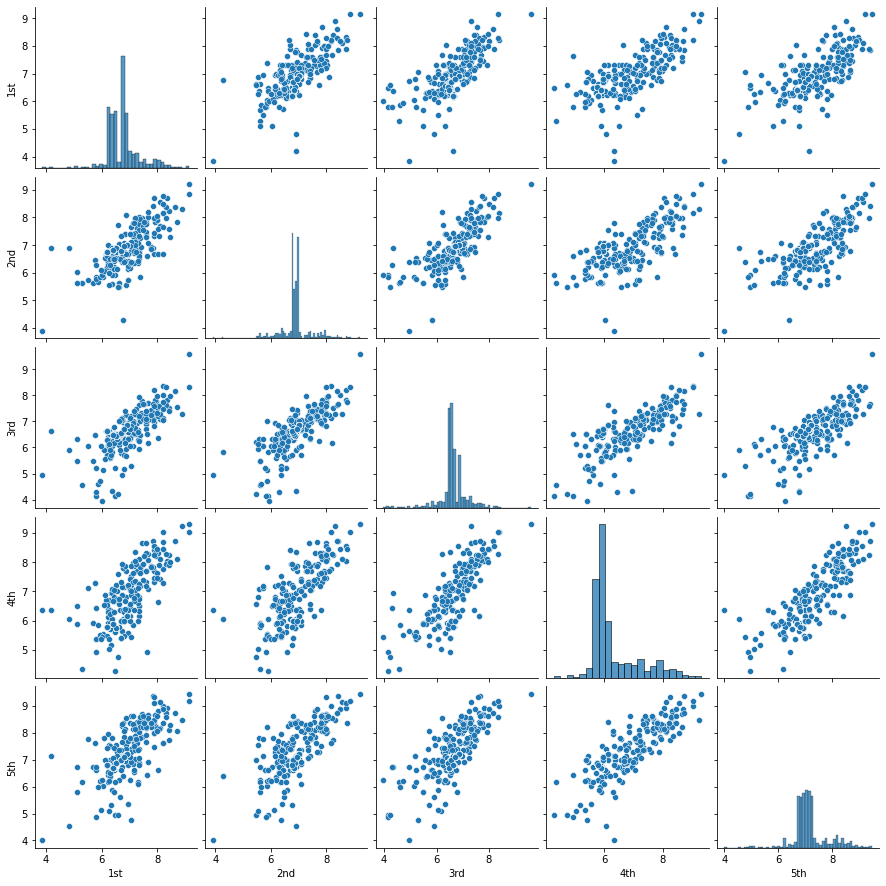

In [29]:
# Pair plot of correlation

import seaborn as sns
sns.pairplot(df)

In [30]:
df

,1st,2nd,3rd,4th,5th,College Code,Gender,studentid
0,8.11,7.68,7.11,7.43,8.18,115,F,1151617020.0
1,6.48,5.90,4.15,4.29,4.96,115,M,1151617021.0
2,8.41,8.24,7.52,8.25,7.75,115,F,1151617022.0
3,7.33,6.83,6.33,6.79,6.89,115,M,1151617023.0
4,7.89,7.34,7.22,7.32,7.46,115,M,1151617024.0
...,...,...,...,...,...,...,...,...
451,6.90,7.00,6.85,6.15,7.20,115,M,1152817404.0
452,6.40,6.82,6.48,5.90,6.70,115,M,1151617405.0
453,6.70,6.79,6.55,5.98,7.00,115,F,1152817406.0
454,6.20,6.75,6.62,5.79,6.80,115,F,1151617407.0


# Select only relevent columns only. 

In [31]:
df1 = df[['1st','2nd', '3rd', '4th']] 

In [32]:
df1

,1st,2nd,3rd,4th
0,8.11,7.68,7.11,7.43
1,6.48,5.90,4.15,4.29
2,8.41,8.24,7.52,8.25
3,7.33,6.83,6.33,6.79
4,7.89,7.34,7.22,7.32
...,...,...,...,...
451,6.90,7.00,6.85,6.15
452,6.40,6.82,6.48,5.90
453,6.70,6.79,6.55,5.98
454,6.20,6.75,6.62,5.79


In [33]:
from sklearn.model_selection import train_test_split

X = df1
y = df['5th'] 

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=2/3, random_state=21)


In [34]:
X

,1st,2nd,3rd,4th
0,8.11,7.68,7.11,7.43
1,6.48,5.90,4.15,4.29
2,8.41,8.24,7.52,8.25
3,7.33,6.83,6.33,6.79
4,7.89,7.34,7.22,7.32
...,...,...,...,...
451,6.90,7.00,6.85,6.15
452,6.40,6.82,6.48,5.90
453,6.70,6.79,6.55,5.98
454,6.20,6.75,6.62,5.79


In [35]:
y

0      8.18
1      4.96
2      7.75
3      6.89
4      7.46
       ... 
451    7.20
452    6.70
453    7.00
454    6.80
455    7.10
Name: 5th, Length: 456, dtype: float64

In [36]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
regr.fit(X_train,y_train)

round( (regr.score(X_test,y_test)*100) , 2   )

74.6

In [37]:
round( (regr.score(X_train,y_train)*100) , 2   ) 

75.51

In [38]:
regr.predict([[8.11,7.68,100.11,200.43]])  

array([98.38133962])

In [39]:
regr.intercept_

-0.31482031211156514

In [40]:
y_pred = regr.predict(X_test)
difference = y_test - y_pred
dif = round(difference, 2)   
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': dif})
df3

,Actual,Predicted,Difference
185,6.80,6.748156,0.05
142,7.71,7.344598,0.37
190,7.00,6.935029,0.06
37,8.14,8.350505,-0.21
61,8.29,7.892859,0.40
...,...,...,...
387,6.90,6.808326,0.09
394,7.20,7.173286,0.03
400,7.20,7.173286,0.03
36,8.39,8.020405,0.37


# Residual Sum of Squares

In [41]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)
min_rss

1st    15567.073568
2nd    13401.848891
3rd    16653.841291
4th    12211.006587
dtype: float64

# MSE

In [42]:
mse = min_rss/len(y)                                   #  min_rss / degree of freedom   
mse                                   #value should be 0 to infinite but not negative. 

1st    34.138319
2nd    29.390019
3rd    36.521582
4th    26.778523
dtype: float64